# BIOS512 Assignment #4

🌬 For this assignment we are going to work with [Canada wind turbine](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/readme.md) data from TidyTuesday. 💨

Use `read_csv` to load the data from the TidyTuesday GitHub repository. The project URL is can be found at [https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/).

In [1]:
library('tidyverse')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
turbine = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-10-27/wind-turbine.csv', col_types=cols())

turbine |> head()

objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Alberta,Optimist Wind Energy,0.90,OWE1,1/2,150,23,30,Bonus,AN 150/30,1993,49.52535,-114.0548,NA
2,Alberta,Castle River Wind Farm,44.00,CRW1,1/60,600,44,40,Vestas,V44/600,1997,49.51264,-114.0357,NA
3,Alberta,Waterton Wind Turbines,3.78,WWT1,1/6,600,44,50,Vestas,V44/600,1998,49.23307,-113.6549,NA
4,Alberta,Waterton Wind Turbines,3.78,WWT2,2/6,600,44,50,Vestas,V44/600,1998,49.23303,-113.6302,NA
5,Alberta,Waterton Wind Turbines,3.78,WWT3,3/6,600,44,50,Vestas,V44/600,1998,49.21755,-113.6802,NA
6,Alberta,Waterton Wind Turbines,3.78,WWT4,4/6,660,47,50,Vestas,V47/660,2000,49.21773,-113.6579,NA


Each row in the table represents a single turbine.

Make a bar chart 📊 **sorted by frequency** of turbine count per province territory. (Hint: `fct_infreq` will sort your factor levels by frequency for subsequent plotting)

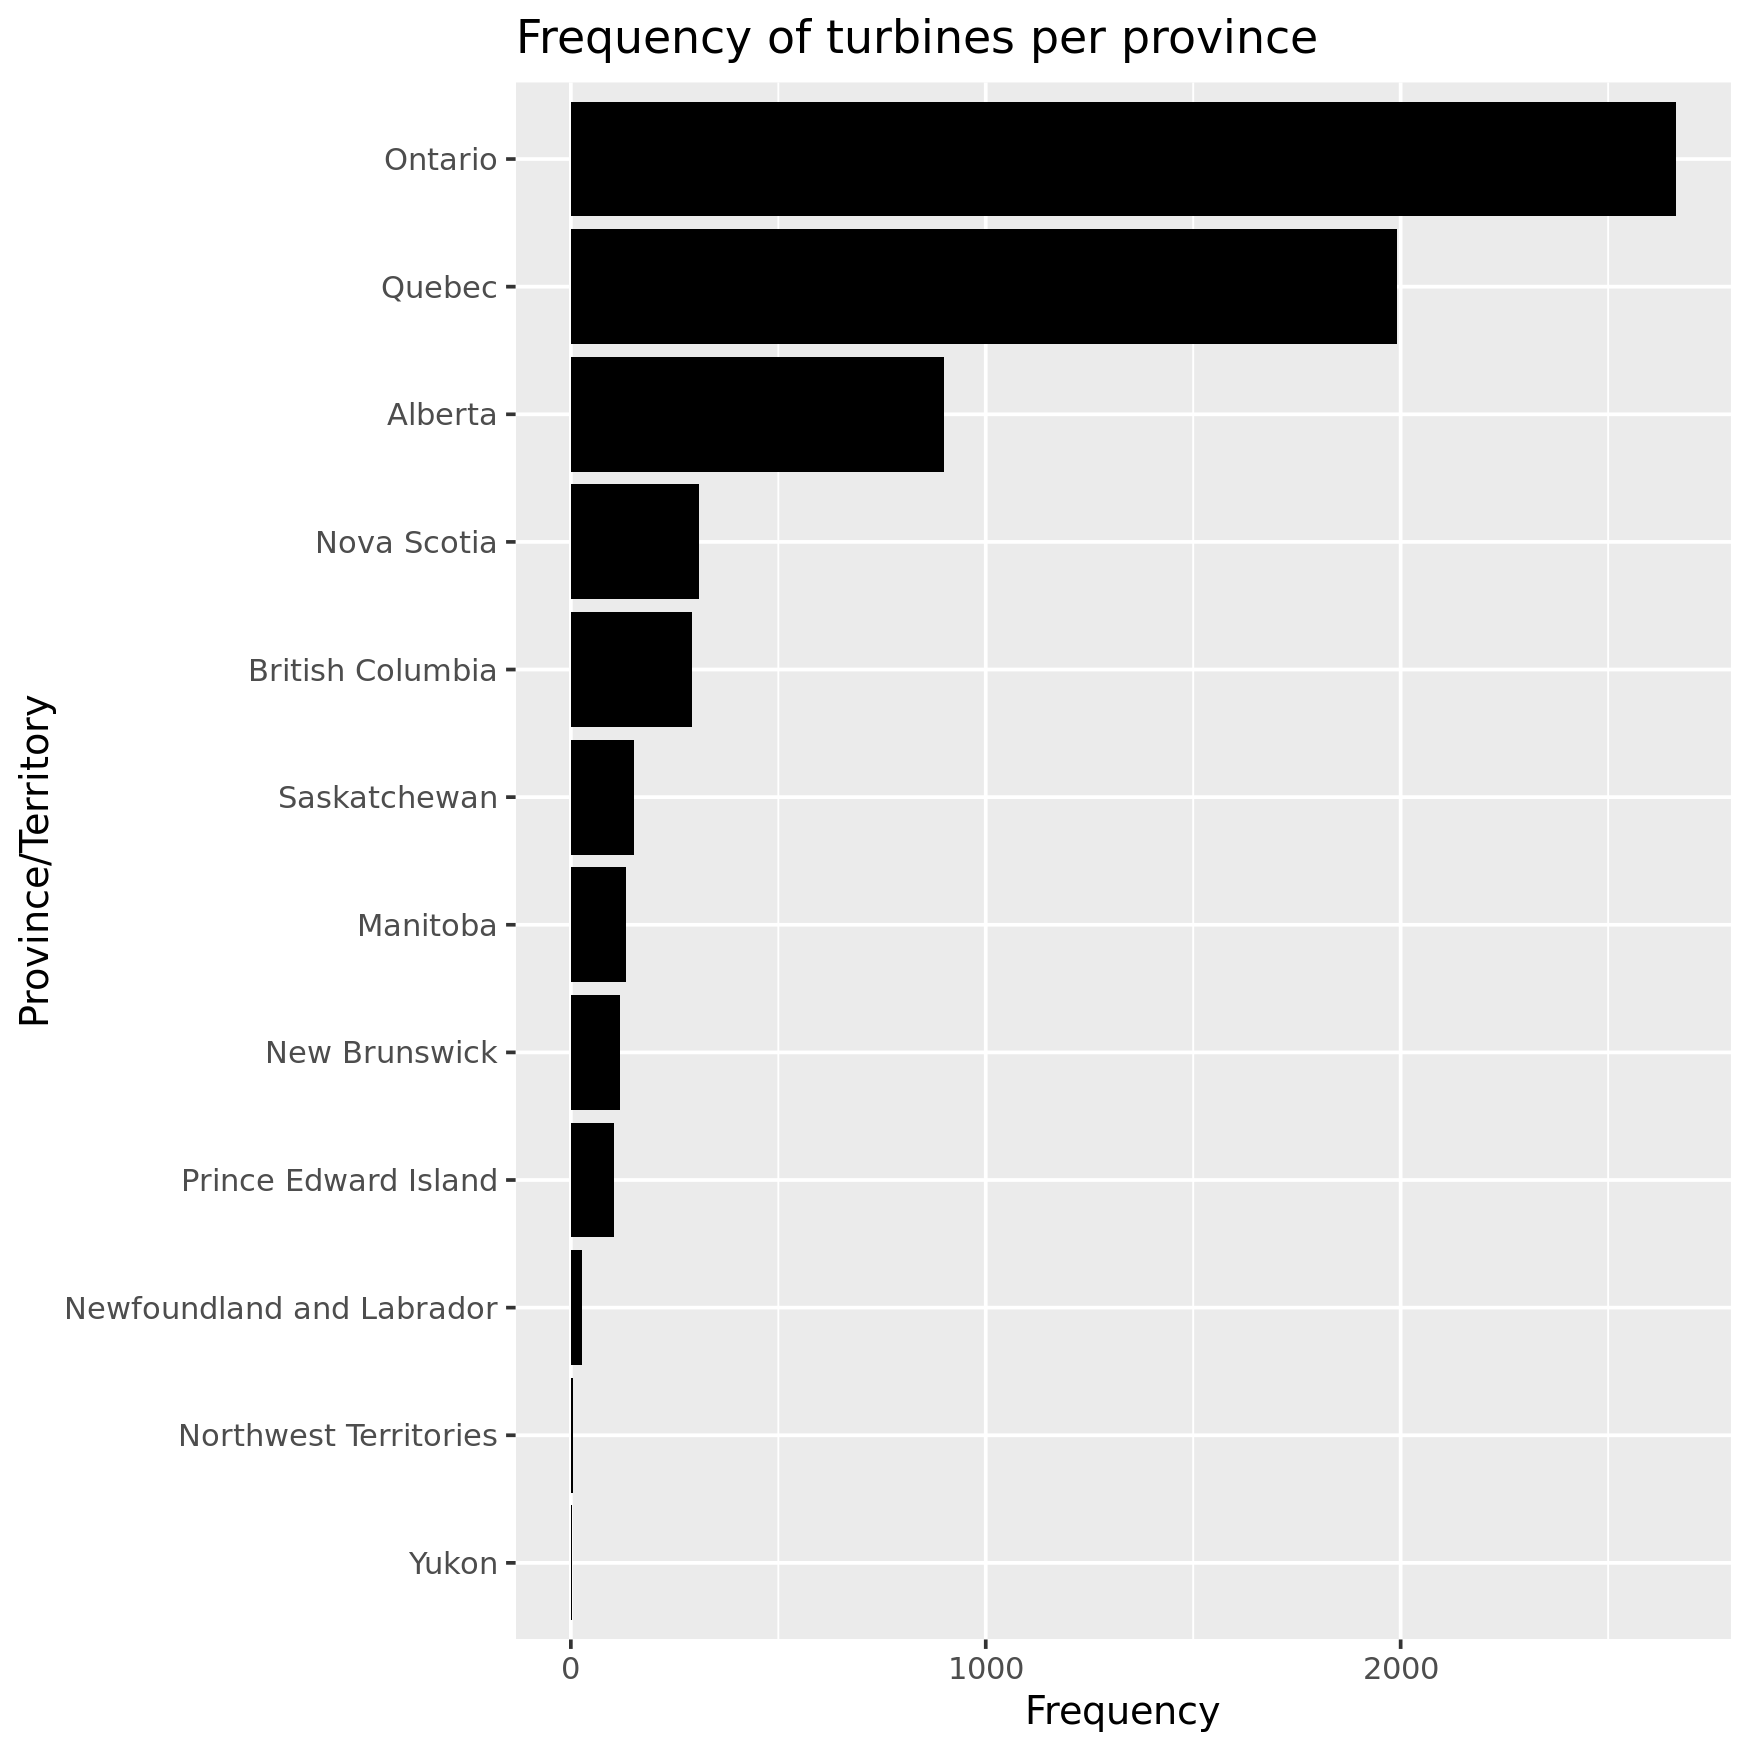

In [17]:
options(repr.plot.reso=300)

turbine2 = turbine |> 
    mutate(province= province_territory %>% fct_infreq() %>% fct_rev())

ggplot(turbine2, aes(y=province)) +
    geom_bar(fill=033)+
    labs(x="Frequency", y="Province/Territory", title="Frequency of turbines per province")
    
    

Make a bar chart **sorted by frequency** of turbine count per manufacturer. **Group the low frequency manufacturers into an `Other` category**.

**Bonus:** Can you force the `Other` category to be the last bar? 

In [4]:
turbine|> count(manufacturer)

manufacturer,n
<chr>,<int>
Acciona,34
Acciona Wind Power,40
Bonus,2
DeWind,5
EWT,2
Enercon,960
GE,1725
Gamesa,8
Lagerwey,2


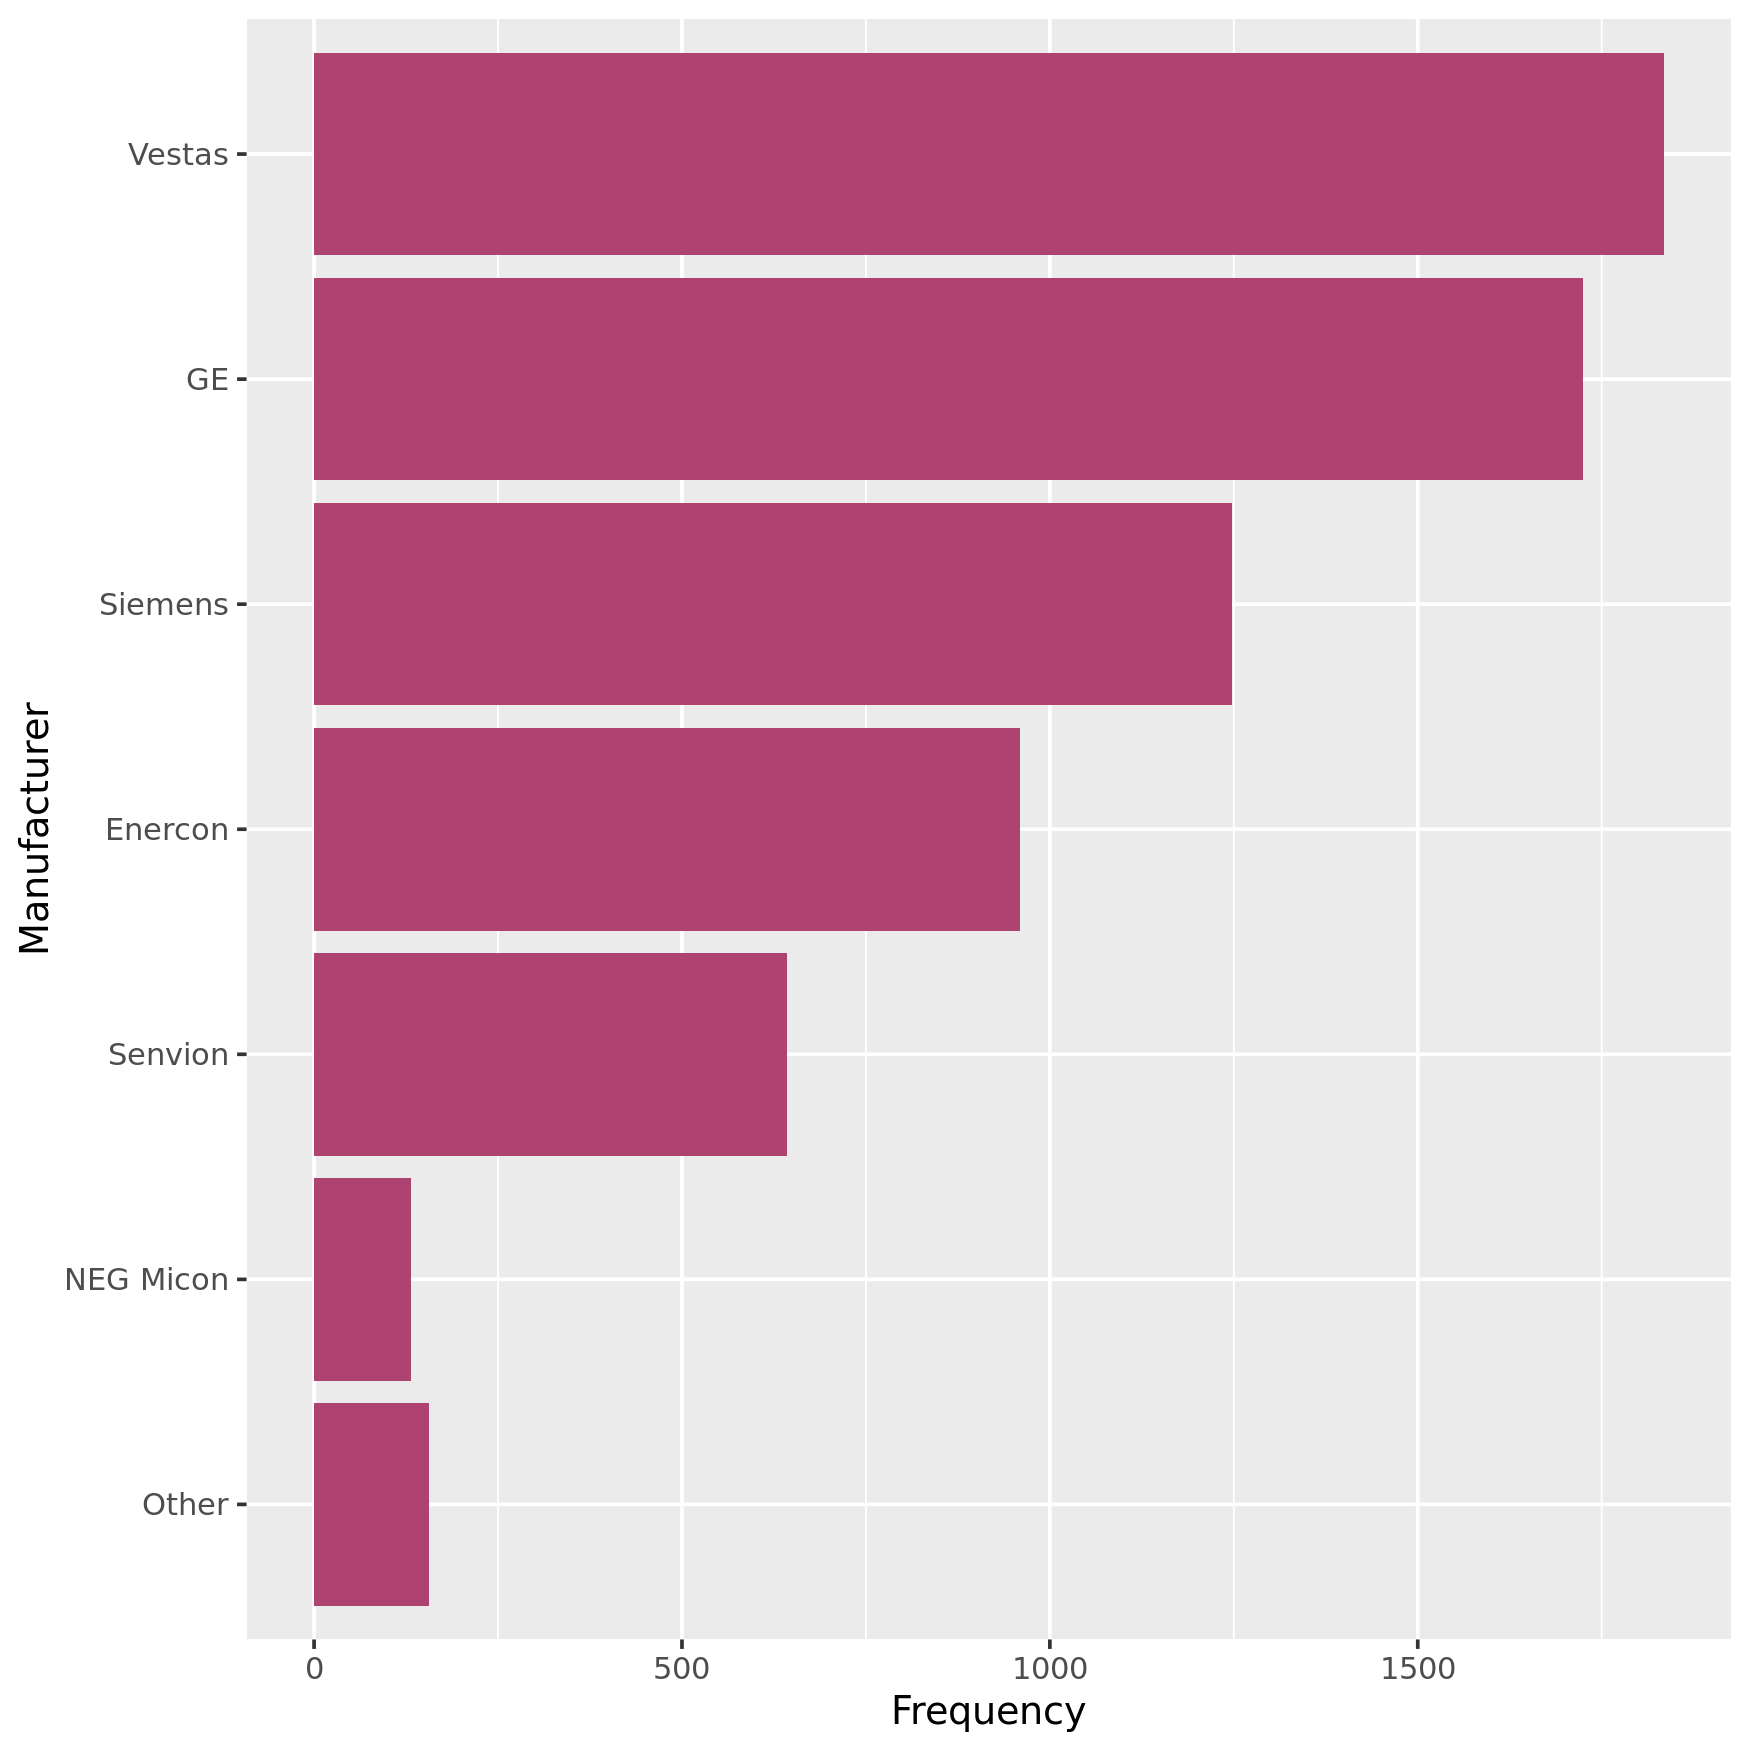

In [16]:
options(repr.plot.res=250)

turbine.manuf = turbine |> 
    mutate(manufacturer_lumped=manufacturer %>% fct_lump_min(132) 
           %>% fct_infreq() %>% fct_relevel('Other', after=Inf) %>% fct_rev()) 

  
ggplot(turbine.manuf, aes(y=manufacturer_lumped)) +
    geom_bar(fill='#AE4371') +
    labs(x="Frequency", y="Manufacturer")

In [6]:
turbine.manuf |> pull (manufacturer_lumped) |> levels()

[1] "Other"              "Acciona"            "Acciona Wind Power"
[4] "NEG Micon"          "Senvion"            "Enercon"           
[7] "Siemens"            "GE"                 "Vestas"